## Linear Regression

In [1]:
import torch

### Data

In [2]:
inputs = torch.randn(100, 5) * 100
inputs.shape, inputs.dtype

(torch.Size([100, 5]), torch.float32)

In [3]:
targets = torch.randn(100, 2)
targets.shape, targets.dtype

(torch.Size([100, 2]), torch.float32)

### TensorData and DataLoader

In [4]:
len(inputs)

100

In [5]:
## Split the data
train_split = int(0.8 * len(inputs))
x_train, y_train = inputs[:train_split] , targets[:train_split]
x_test, y_test = inputs[train_split:], targets[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

In [6]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [7]:
## creating datasets
train_ds = TensorDataset(x_train, y_train)
train_ds[:10]

(tensor([[ -61.9247, -217.9672,  -99.8743,   68.6880,  -27.3298],
         [ -22.7840,   39.2534,  -11.2673, -239.0415,   -9.8957],
         [ -19.6231,  159.6029,  190.8993,  -89.2801,   98.7905],
         [  25.9496,  -40.8997,  -70.9564,   97.0495,  157.5534],
         [-104.4455,  129.8809, -107.1379,  116.0827, -104.7168],
         [-226.8839,  209.4116,   60.4764,  -97.5280, -111.9404],
         [ -17.0802,   71.4301, -225.5742,  -55.6949,    3.6870],
         [ 204.9335,  -34.3126,   11.2027,   59.8019,  -23.9035],
         [-122.6410,   20.1915,  110.4470, -100.9447, -111.2147],
         [ 186.6520, -172.8651,   11.8179, -137.2512,  -22.2099]]),
 tensor([[ 1.5106, -0.8462],
         [-2.4603, -0.6741],
         [ 0.1449,  0.3987],
         [-1.1618,  0.8114],
         [ 0.2542,  1.3837],
         [ 1.2673,  0.3409],
         [ 0.8272, -1.0949],
         [ 0.4181, -0.7191],
         [ 1.6765,  0.8477],
         [ 0.5923,  0.0862]]))

In [8]:
test_ds = TensorDataset(x_test, y_test)
test_ds[:10]

(tensor([[ 114.3698,  -38.8887,  163.9570,  -86.7311,  -99.5038],
         [ -22.8214,  143.3197,  -14.8847,  101.4488,  116.3242],
         [  69.1453,  -10.7741, -165.3071,   82.0632, -119.7398],
         [  53.5655,   59.5061,  -24.6139,  -52.0186, -104.1631],
         [ -26.1001,   21.8371,  -30.0379,   -5.9263,   34.5876],
         [  40.6518,  -31.8352,   47.2054, -110.1175,   79.4285],
         [ -73.5309,  -34.1037,  -93.7125,   55.7309,   -5.6032],
         [  34.8867, -151.4880,  -48.7485, -106.2224,  -48.4488],
         [ -69.6134,   65.3084,  126.6840, -122.3938,   14.2049],
         [  89.5789, -161.9427,  134.5097,  -55.9250,  -35.6337]]),
 tensor([[-0.4264, -1.0198],
         [-1.5959, -0.5971],
         [ 0.0042, -1.5124],
         [-0.0669,  0.5582],
         [-0.9992, -0.9706],
         [-1.0143,  0.6370],
         [ 0.5518, -0.1723],
         [ 0.9755,  0.1754],
         [-0.2910,  0.1925],
         [ 0.9081,  0.8366]]))

In [9]:
## creating dataloaders
train_dl = DataLoader(dataset=train_ds, batch_size = 25, shuffle = True)
test_dl = DataLoader(test_ds, batch_size = 10)

In [10]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[  90.0058,  -22.8771,  153.5106,  -84.0114, -104.2671],
        [-107.0082,  -14.3395,   39.7977,   91.1041, -160.5598],
        [ -22.7840,   39.2534,  -11.2673, -239.0415,   -9.8957],
        [-240.4731,   26.2189,   70.5577,  -89.7222,  160.6113],
        [  85.0220,  116.3102, -181.0304,   48.2659,   95.1644],
        [-241.7094,   56.9646,  118.0509,   87.4522,   79.0630],
        [   6.3418,  -30.9101,  -47.0893,   75.7593, -199.1144],
        [ -10.6650, -120.2351,  101.1495,  210.4042,   73.9466],
        [ 162.4057,  -29.2748,  -92.4220, -163.0853, -108.8403],
        [  25.9496,  -40.8997,  -70.9564,   97.0495,  157.5534],
        [ -73.5393,  146.0105,  -16.6582,  -60.3108,   34.5006],
        [ -17.0802,   71.4301, -225.5742,  -55.6949,    3.6870],
        [-109.1400,  -67.7315,  -26.7585,  129.0772,  -50.3273],
        [-128.2383,   96.8689,  -15.9644,   73.1439, -157.4208],
        [  -0.5540,  109.4940,  155.6124,  -84.8746, -160.6047],
        [  52.9922,   -3.

In [11]:
for xb, yb in test_dl:
    print(xb)
    print(yb)
    break

tensor([[ 114.3698,  -38.8887,  163.9570,  -86.7311,  -99.5038],
        [ -22.8214,  143.3197,  -14.8847,  101.4488,  116.3242],
        [  69.1453,  -10.7741, -165.3071,   82.0632, -119.7398],
        [  53.5655,   59.5061,  -24.6139,  -52.0186, -104.1631],
        [ -26.1001,   21.8371,  -30.0379,   -5.9263,   34.5876],
        [  40.6518,  -31.8352,   47.2054, -110.1175,   79.4285],
        [ -73.5309,  -34.1037,  -93.7125,   55.7309,   -5.6032],
        [  34.8867, -151.4880,  -48.7485, -106.2224,  -48.4488],
        [ -69.6134,   65.3084,  126.6840, -122.3938,   14.2049],
        [  89.5789, -161.9427,  134.5097,  -55.9250,  -35.6337]])
tensor([[-0.4264, -1.0198],
        [-1.5959, -0.5971],
        [ 0.0042, -1.5124],
        [-0.0669,  0.5582],
        [-0.9992, -0.9706],
        [-1.0143,  0.6370],
        [ 0.5518, -0.1723],
        [ 0.9755,  0.1754],
        [-0.2910,  0.1925],
        [ 0.9081,  0.8366]])


### Creating The model

In [12]:
import torch.nn as nn

In [13]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear = nn.Linear(in_features=5, out_features=2)
        
    def forward(self, x):
        return self.Linear(x)

In [14]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('Linear.weight',
              tensor([[-0.4318,  0.3196,  0.3114,  0.3942, -0.0207],
                      [-0.4429, -0.1625,  0.2142,  0.1243, -0.1866]])),
             ('Linear.bias', tensor([0.2775, 0.3245]))])

In [15]:
initial_weight = list(model_0.parameters())[0]
initial_bias = list(model_0.parameters())[1]
initial_weight, initial_bias

(Parameter containing:
 tensor([[-0.4318,  0.3196,  0.3114,  0.3942, -0.0207],
         [-0.4429, -0.1625,  0.2142,  0.1243, -0.1866]], requires_grad=True),
 Parameter containing:
 tensor([0.2775, 0.3245], requires_grad=True))

### Loss fn and optimizer

In [19]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.000001)

### Training

In [20]:
def fit(num_epochs, train_dl, test_dl, model, loss_fn, optimizer = torch.optim.SGD):
    train_loss_values = []
    test_loss_values = []
    epoch_count = []
    history = {}

    for epoch in range(num_epochs):
        ## Trainset
        for xb, yb in train_dl:
            model.train()
            train_pred = model(xb)
            train_loss = loss_fn(train_pred, yb)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

        ## Test set
        model.eval()
        with torch.no_grad():
            for xt, yt in test_dl:
                test_pred = model(xt)
                test_loss = loss_fn(test_pred, yt)
            if (epoch+1) % 10 == 0:
                    epoch_count.append(epoch)
                    train_loss_values.append(train_loss.detach().numpy())
                    test_loss_values.append(test_loss.detach().numpy())
                    history['train_loss'] = train_loss_values
                    history['test_loss'] = test_loss_values
                    history['epochs'] = epoch_count
                    print(f"Epoch: {epoch+1} | Train Loss: {train_loss} | Test Loss: {test_loss} ")
    return history

In [21]:
history = fit(100, train_dl, test_dl, model_0, loss_fn, optimizer)

Epoch: 10 | Train Loss: 2472.85302734375 | Test Loss: 2686.40673828125 
Epoch: 20 | Train Loss: 385.00653076171875 | Test Loss: 1108.2059326171875 
Epoch: 30 | Train Loss: 343.41204833984375 | Test Loss: 442.58697509765625 
Epoch: 40 | Train Loss: 182.35812377929688 | Test Loss: 195.7841033935547 
Epoch: 50 | Train Loss: 57.03345489501953 | Test Loss: 84.41715240478516 
Epoch: 60 | Train Loss: 25.533239364624023 | Test Loss: 40.63370895385742 
Epoch: 70 | Train Loss: 15.748547554016113 | Test Loss: 21.175716400146484 
Epoch: 80 | Train Loss: 11.33708667755127 | Test Loss: 11.544022560119629 
Epoch: 90 | Train Loss: 2.613964557647705 | Test Loss: 6.760394096374512 
Epoch: 100 | Train Loss: 4.320398807525635 | Test Loss: 4.276523590087891 


In [22]:
import matplotlib.pyplot as plt

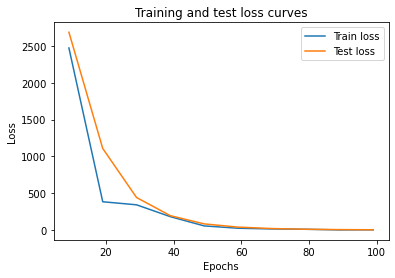

In [23]:
# Plot the loss curves
plt.plot(history['epochs'], history['train_loss'], label="Train loss")
plt.plot(history['epochs'], history['test_loss'], label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();